In [1]:
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt
import numpy as np 
import math
from skimage import exposure

# Equations  

## Log Function 
s = c log(1+r) 

## Inverse Log Function 
s = c log<sup>-1</sup>(1+r)

## Power Law Function 
s = cr<sup>$\lambda$</sup>

    



Text(0.5, 1.0, 'Gray')

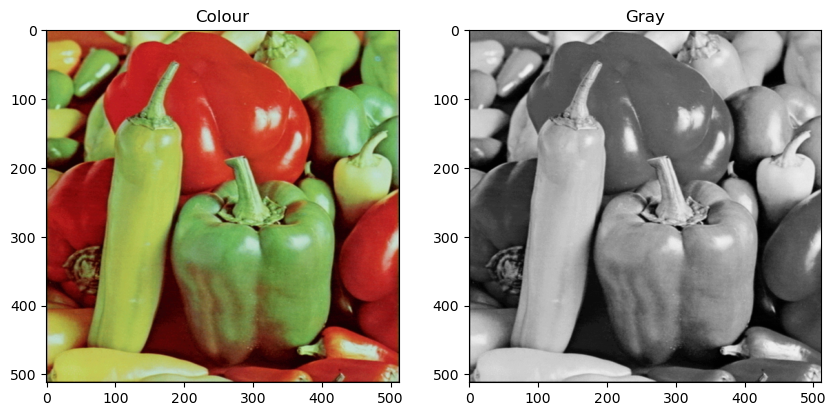

In [2]:
image = cv2.imread('./image.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(10,10))
row = 1
col = 2 

fig.add_subplot(row, col, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Colour')

fig.add_subplot(row, col, 2)
plt.imshow(gray, cmap='gray')
plt.title('Gray')

In [3]:
def power_law_func(x, y): 
    
    return math.floor(((x/255)**y)*255)
    

power_vectorized = np.vectorize(power_law_func)

In [4]:
def transform(og_img, y): 
    
    new_img = power_vectorized(og_img, y)
    
    fig = plt.figure(figsize=(10,10))
    row = 1
    col = 2 
    
    fig.add_subplot(row, col, 1)
    plt.imshow(new_img, cmap='gray')
    new_title = 'New lambda: {lam}'.format(lam=y)
    plt.title(new_title)
    
    fig.add_subplot(row, col, 2)
    plt.imshow(og_img, cmap='gray')
    plt.title('Old')
    
    return new_img
    
    

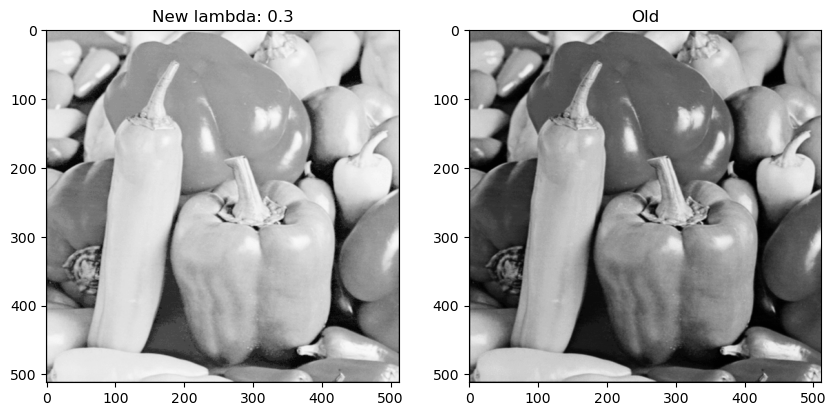

In [5]:
low_lambda = transform(gray, 0.3)

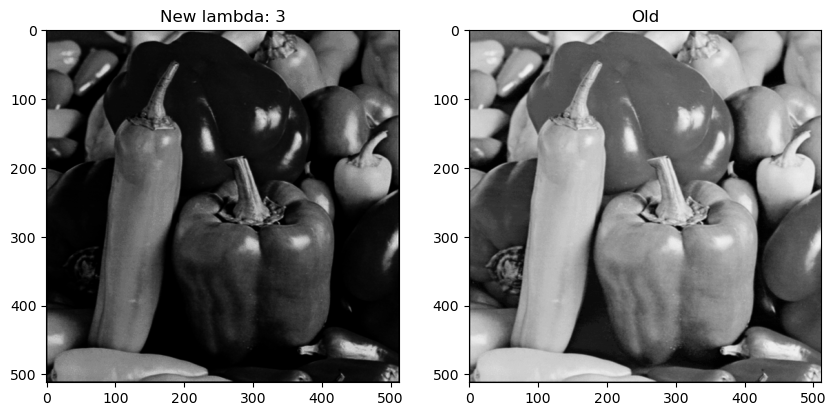

In [6]:
high_lambda = transform(gray, 3)

In [7]:
def get_bits(x, i): 
    
    return (x >> i) & 1

def get_bits_new(x, i, j): 
    
    return (x >> i) | (x >> j)

get_bit_vectorized = np.vectorize(get_bits)
get_new_bit_vectorized = np.vectorize(get_bits_new)

In [12]:
def show_bits(img, i): 
    
    new_img = get_bit_vectorized(img, i)
    plt.imshow(new_img, cmap='gray')
    plt.title('Bit Slice: {bit}'.format(bit=i))
        

def show_bits_new(img, i, j): 
    
    new_img = get_new_bit_vectorized(img, i, j)
    plt.imshow(new_img, cmap='gray')
    plt.title('Bit Slice: {bit1}, {bit2}'.format(bit1=i, bit2=j))

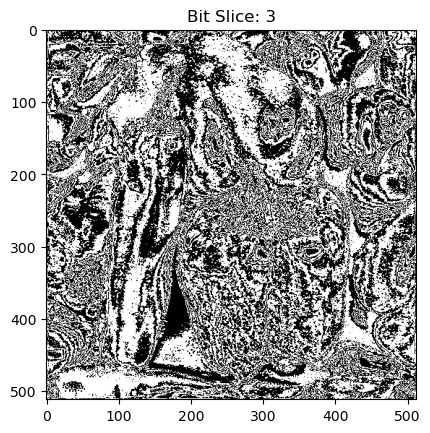

In [13]:
show_bits(gray, 3)

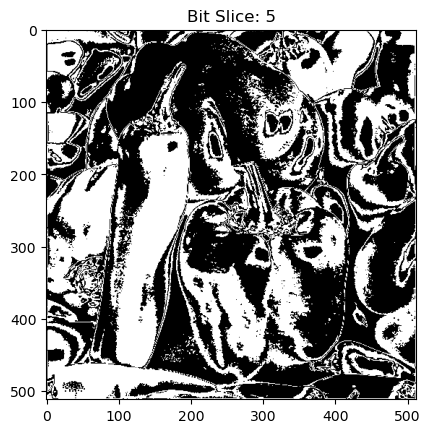

In [14]:
show_bits(gray, 5)

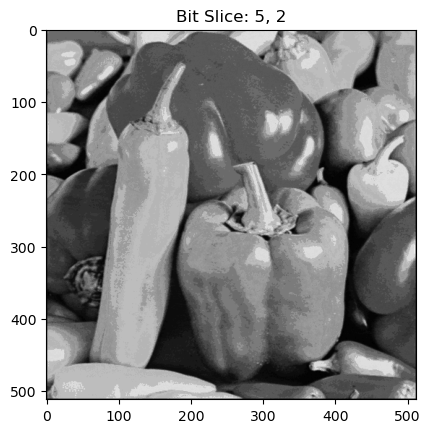

In [15]:
show_bits_new(gray, 5, 2)

In [16]:
def display_hist(normal, low, high): 
    
    fig = plt.figure(figsize=(10,28))
    row = 3
    col = 1
    
    fig.add_subplot(row, col, 1)
    normal_flat = normal.flatten()
    plt.hist(normal, bins=256)
    plt.title('Histogram Original Image')
    
    fig.add_subplot(row, col, 2)
    low_flat = low.flatten()
    plt.hist(low_flat, bins=256)
    plt.title('Histogram Lambda: 0.3')
    
    fig.add_subplot(row, col, 3)
    high_flat = high.flatten()
    plt.hist(high_flat, bins=256)
    plt.title('Histogram Lambda: 3')
    
    plt.show()


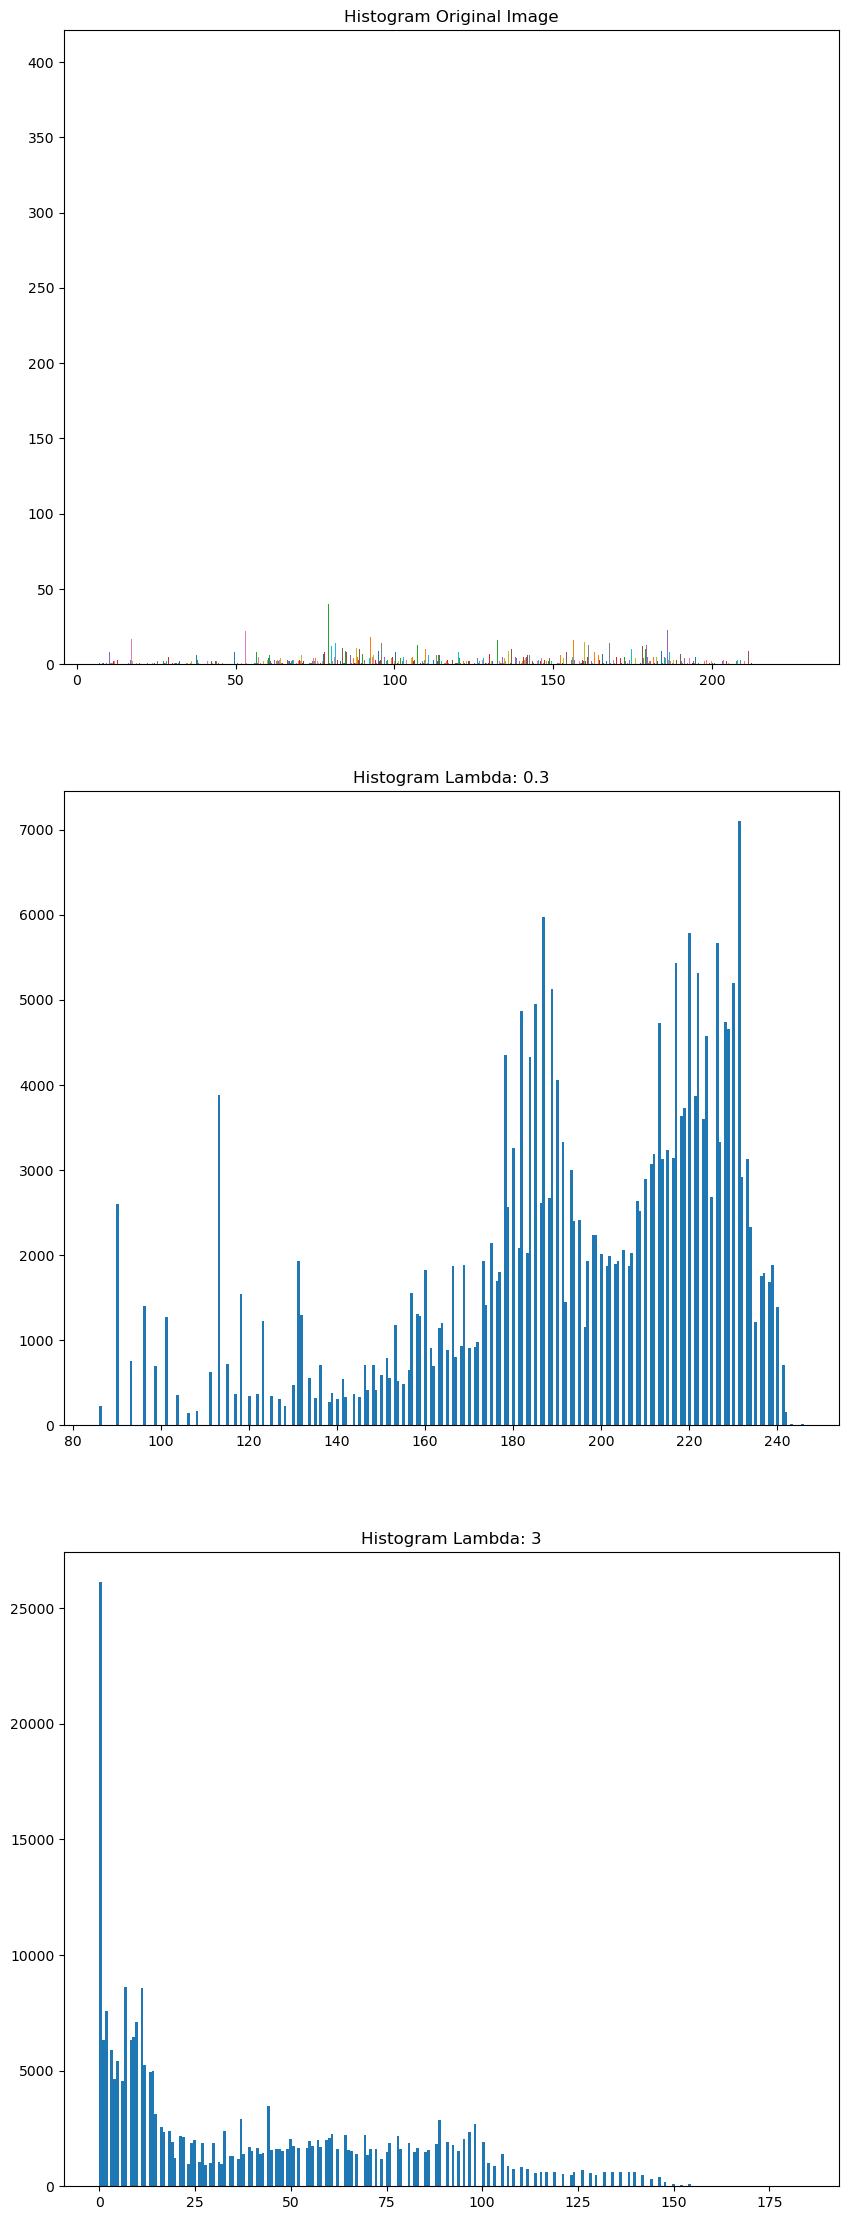

In [17]:
display_hist(gray, low_lambda, high_lambda)

In [39]:
def display_hist_eq(normal): 
    
    equalized = cv2.equalizeHist(normal.astype(np.uint8))
    
    fig = plt.figure(figsize=(10,28))
    row = 2
    col = 1
    
    fig.add_subplot(row, col, 1)
    normal_flat = normal.flatten()
    plt.hist(normal, bins=256)
    plt.title('Histogram Original Image')
    
    fig.add_subplot(row, col, 2)
    equalized_flat = equalized.flatten()
    plt.hist(equalized_flat, bins=256)
    plt.title('Histogram Equalized Image')
  
    

In [35]:
def display_two_image(img1, img2):
    
    fig = plt.figure(figsize=(10, 10))
    row = 1
    col = 2
    
    fig.add_subplot(row, col, 1)
    plt.imshow(img1, cmap='gray')
    
    fig.add_subplot(row, col, 2)
    plt.imshow(img2, cmap='gray')
  

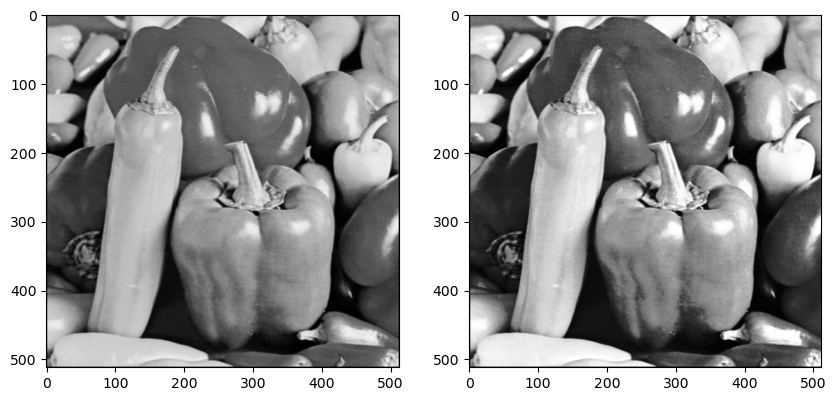

In [36]:
display_two_image(gray, normal_eq)

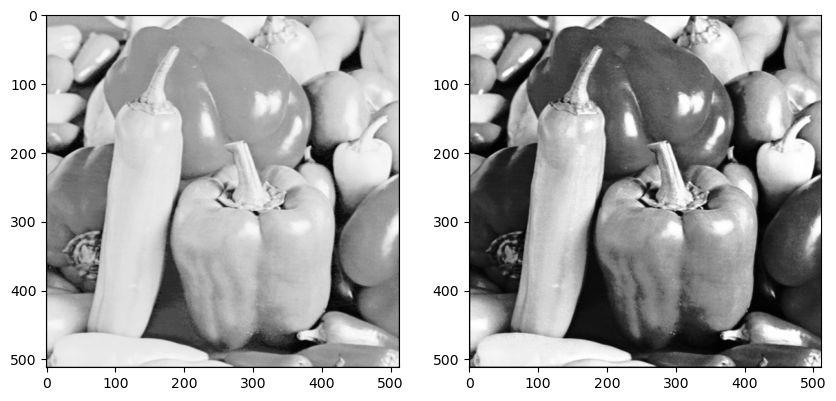

In [37]:
display_two_image(low_lambda, low_eq)

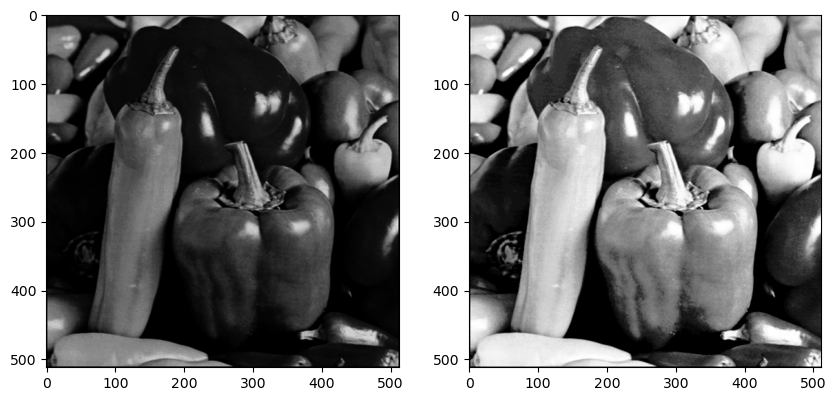

In [38]:
display_two_image(high_lambda, high_eq)

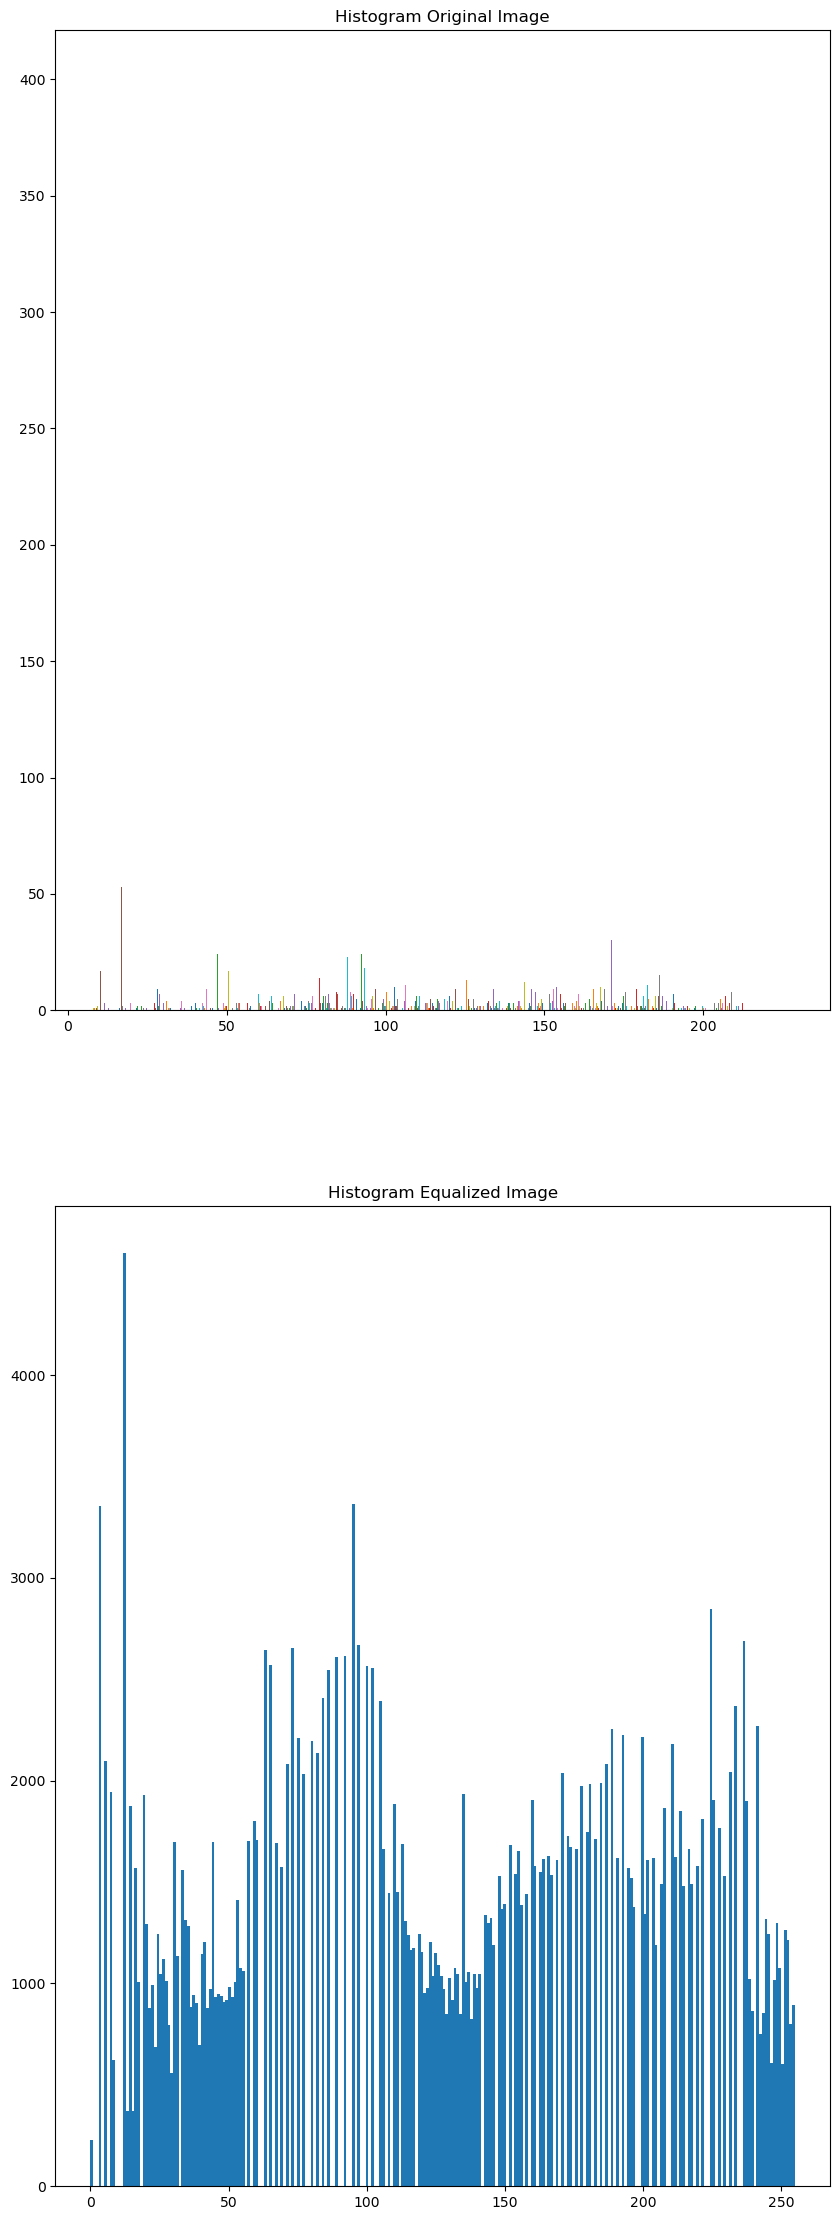

In [40]:
display_hist_eq(gray)

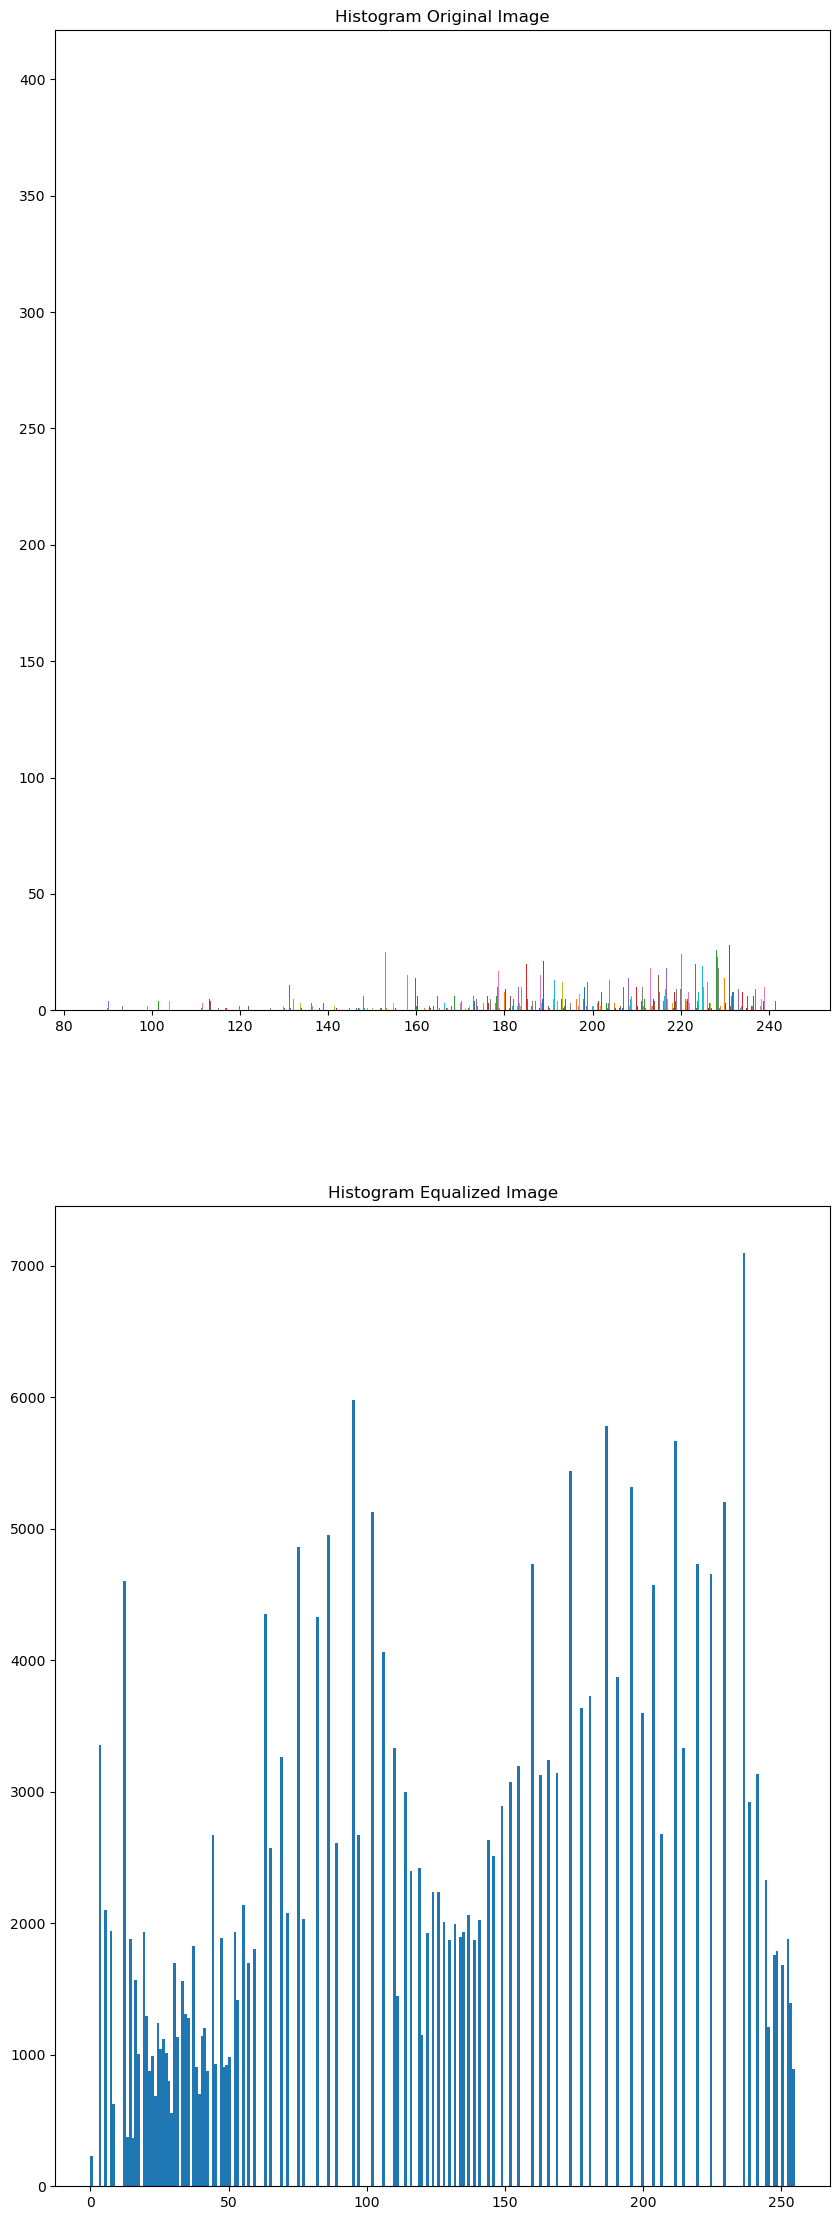

In [41]:
display_hist_eq(low_lambda)

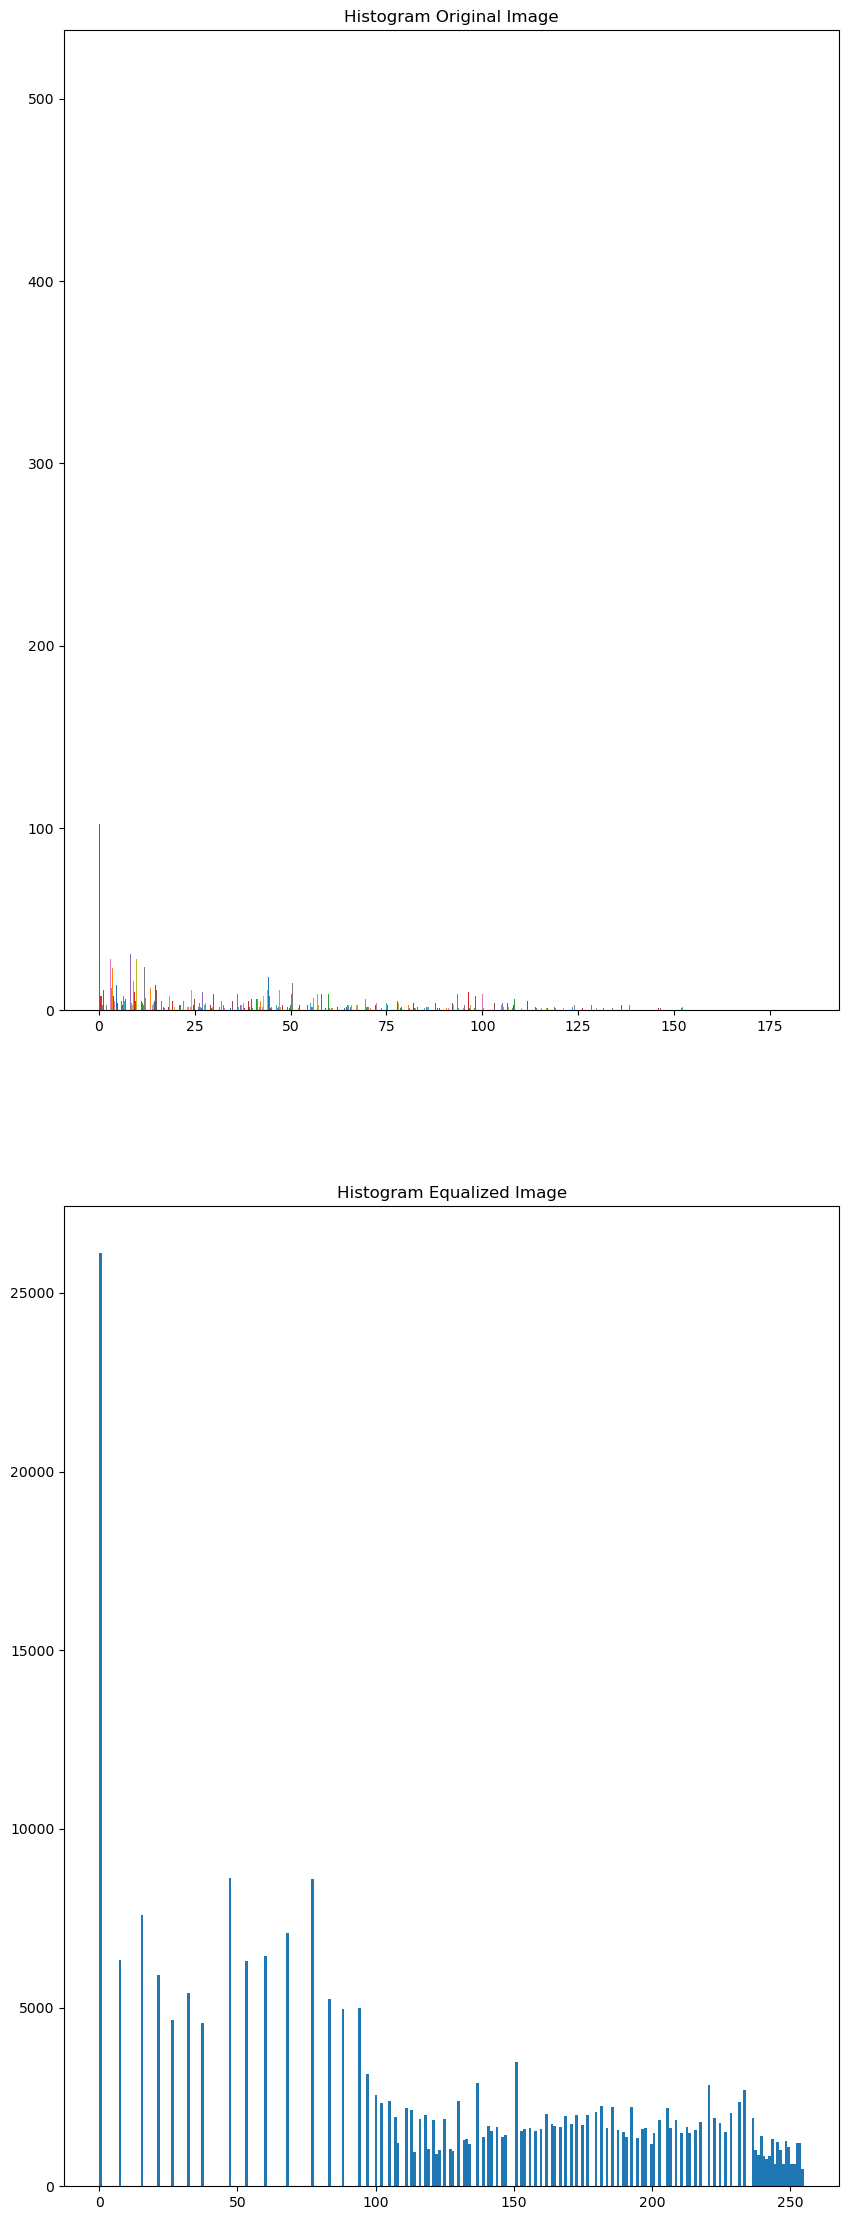

In [42]:
display_hist_eq(high_lambda)